In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
house_data.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
house_data['House Age'].value_counts()

0.0     17
13.6     7
13.3     6
16.2     6
16.4     6
        ..
30.2     1
4.3      1
24.0     1
8.4      1
18.8     1
Name: House Age, Length: 236, dtype: int64

In [6]:
house_data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


array([[<AxesSubplot: title={'center': 'Transaction date'}>,
        <AxesSubplot: title={'center': 'House Age'}>,
        <AxesSubplot: title={'center': 'Distance from nearest Metro station (km)'}>],
       [<AxesSubplot: title={'center': 'Number of convenience stores'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>],
       [<AxesSubplot: title={'center': 'Number of bedrooms'}>,
        <AxesSubplot: title={'center': 'House size (sqft)'}>,
        <AxesSubplot: title={'center': 'House price of unit area'}>]],
      dtype=object)

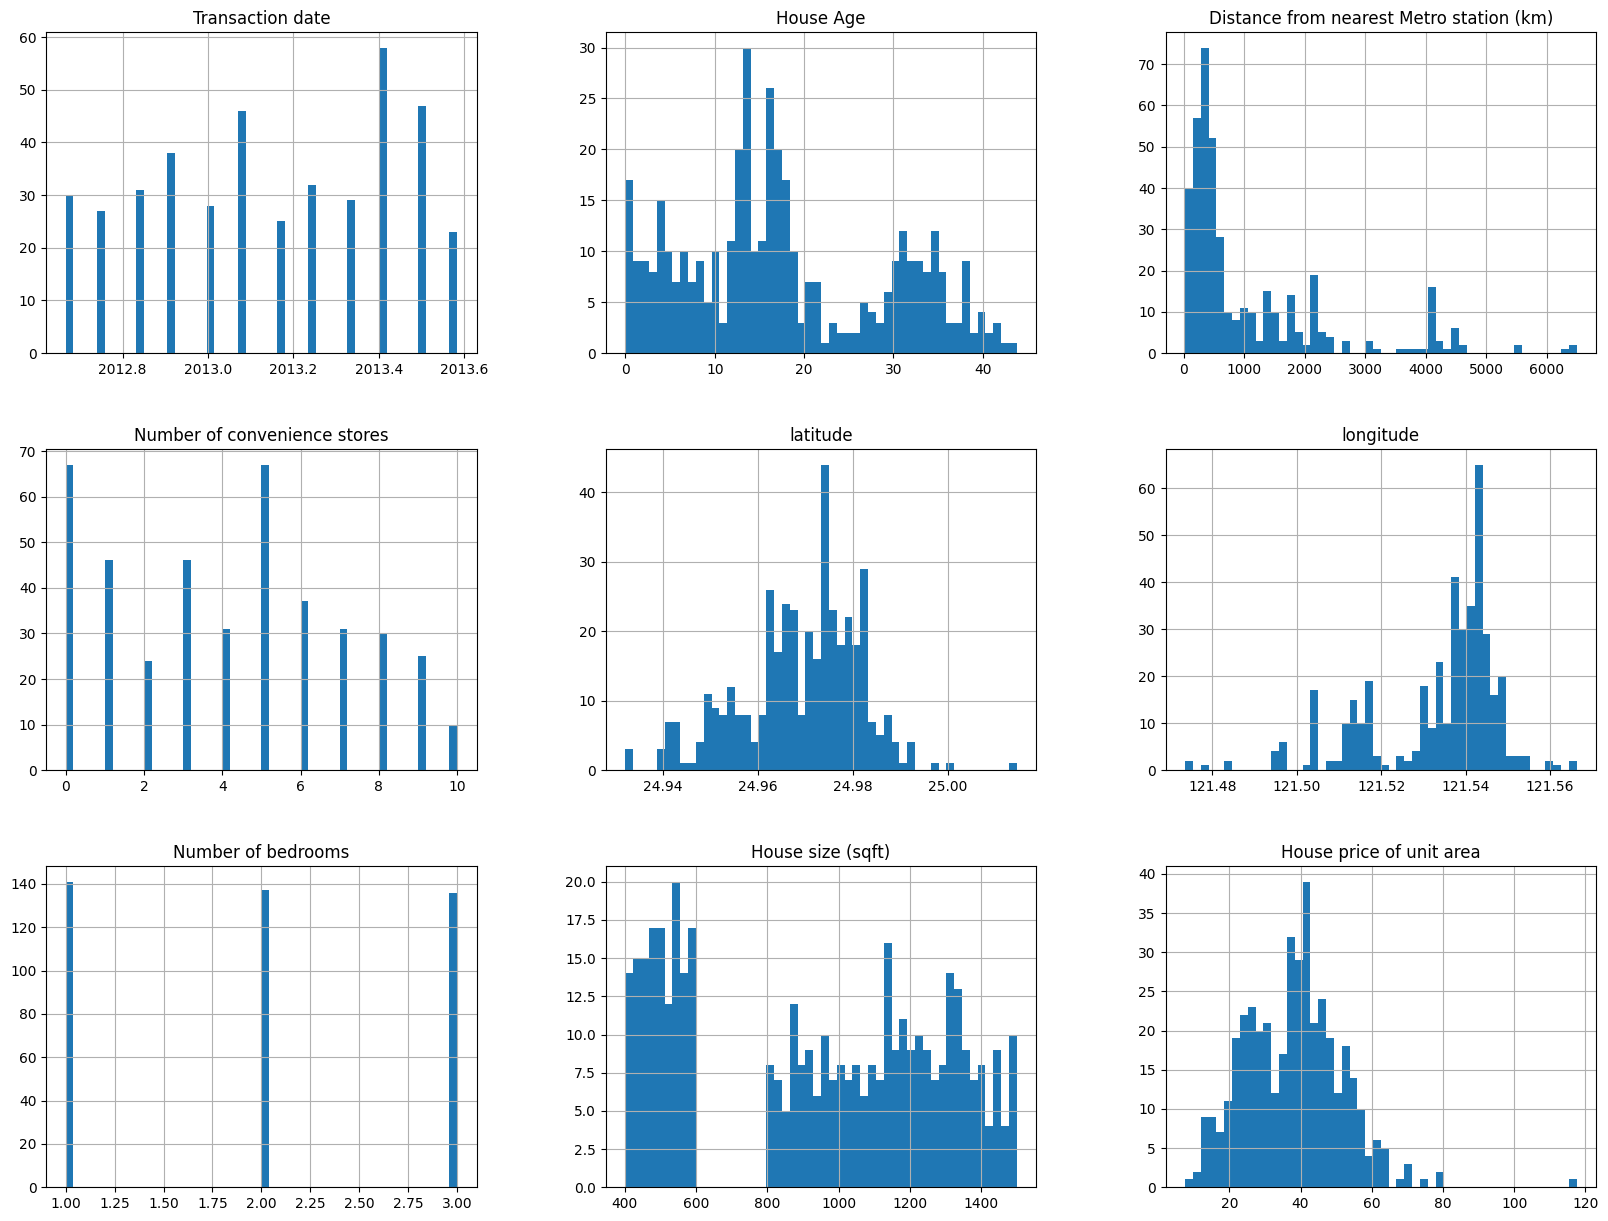

In [7]:
#plotting histogram
house_data.hist(bins=50, figsize=(20, 15))

In [8]:
#Train-Test spliting
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house_data, test_size=0.2, random_state=42)

In [9]:
print('Rows in train set: ',len(train_set), '\nRows in test set: ',len(test_set))

Rows in train set:  331 
Rows in test set:  83


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house_data, house_data['Number of bedrooms']):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc[test_index]

In [11]:
strat_train_set['Number of bedrooms'].value_counts()

1    113
2    109
3    109
Name: Number of bedrooms, dtype: int64

In [12]:
strat_test_set['Number of bedrooms'].value_counts()

2    28
1    28
3    27
Name: Number of bedrooms, dtype: int64

In [13]:
house_train_set = strat_train_set.copy()
house_test_set = strat_test_set.copy()

In [14]:
#Correlations
corr_matrix = house_train_set.corr()
corr_matrix['House price of unit area'].sort_values(ascending=False)

House price of unit area                    1.000000
Number of convenience stores                0.560137
latitude                                    0.556158
longitude                                   0.528784
House size (sqft)                           0.063551
Number of bedrooms                          0.061606
Transaction date                            0.054865
House Age                                  -0.212925
Distance from nearest Metro station (km)   -0.678981
Name: House price of unit area, dtype: float64

array([[<AxesSubplot: xlabel='House price of unit area', ylabel='House price of unit area'>,
        <AxesSubplot: xlabel='House size (sqft)', ylabel='House price of unit area'>,
        <AxesSubplot: xlabel='Number of convenience stores', ylabel='House price of unit area'>,
        <AxesSubplot: xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>],
       [<AxesSubplot: xlabel='House price of unit area', ylabel='House size (sqft)'>,
        <AxesSubplot: xlabel='House size (sqft)', ylabel='House size (sqft)'>,
        <AxesSubplot: xlabel='Number of convenience stores', ylabel='House size (sqft)'>,
        <AxesSubplot: xlabel='Distance from nearest Metro station (km)', ylabel='House size (sqft)'>],
       [<AxesSubplot: xlabel='House price of unit area', ylabel='Number of convenience stores'>,
        <AxesSubplot: xlabel='House size (sqft)', ylabel='Number of convenience stores'>,
        <AxesSubplot: xlabel='Number of convenience stores', ylabel='

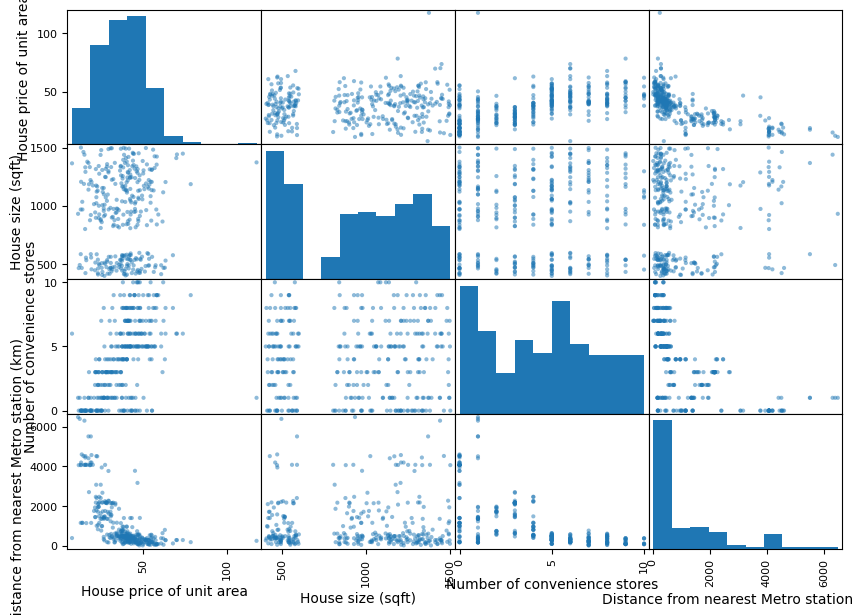

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['House price of unit area', 'House size (sqft)', 'Number of convenience stores', 'Distance from nearest Metro station (km)']
scatter_matrix(house_train_set[attributes], figsize = (10,7))

<AxesSubplot: xlabel='House price of unit area', ylabel='Distance from nearest Metro station (km)'>

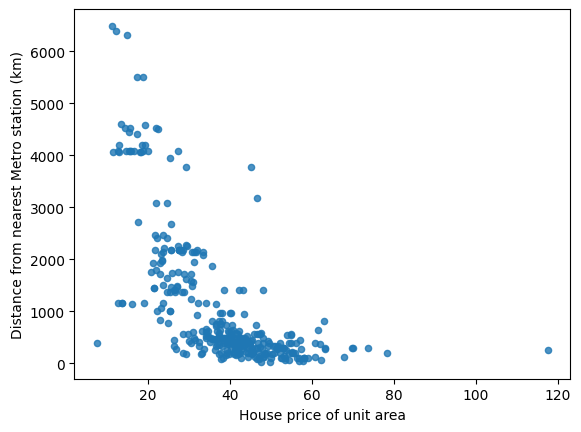

In [16]:
house_train_set.plot(kind = 'scatter', x = 'House price of unit area',  y = 'Distance from nearest Metro station (km)', alpha = 0.8)

In [17]:
#Attribute combination
house_train_set['House size (sqft)_Number of bedrooms'] = house_train_set['House size (sqft)']/house_train_set['Number of bedrooms']

In [18]:
house_train_set['House size (sqft)_Number of bedrooms'].head()

349    444.500000
384    750.000000
241    492.000000
7      438.666667
31     739.000000
Name: House size (sqft)_Number of bedrooms, dtype: float64

In [19]:
#Correlations
corr_matrix = house_train_set.corr()
corr_matrix['House price of unit area'].sort_values(ascending=False)

House price of unit area                    1.000000
Number of convenience stores                0.560137
latitude                                    0.556158
longitude                                   0.528784
House size (sqft)                           0.063551
Number of bedrooms                          0.061606
Transaction date                            0.054865
House size (sqft)_Number of bedrooms       -0.008718
House Age                                  -0.212925
Distance from nearest Metro station (km)   -0.678981
Name: House price of unit area, dtype: float64

In [20]:
#train data
house_train_set = strat_train_set.drop('House price of unit area', axis=1)
house_price = strat_train_set['House price of unit area'].copy()

In [21]:
#Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [22]:
house_training = my_pipeline.fit_transform(house_train_set)
house_training.shape

(331, 8)

In [23]:
#Predicting model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(house_training, house_price)

RandomForestRegressor()

In [24]:
some_data = house_train_set.iloc[:5]
some_price = house_price.iloc[:5]
prep_data = my_pipeline.transform(some_data)
model.predict(prep_data)

array([46.789, 13.489, 42.871, 46.045, 31.913])

In [25]:
list(some_price)

[47.0, 12.9, 41.4, 46.7, 25.0]

In [26]:
from sklearn.metrics import mean_squared_error
house_predictions = model.predict(house_training)
mse = mean_squared_error(house_price, house_predictions)
rmse = np.sqrt(mse)

In [27]:
rmse

3.140115909400686

In [28]:
#better evaluation technique - cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, house_training, house_price, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [29]:
rmse_scores

array([ 7.26848658, 11.47206881,  6.91547446,  8.61219413,  5.38612771])

In [30]:
def print_scores(scores):
    print('Scores: ',scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ', scores.std())

In [31]:
print_scores(rmse_scores)

Scores:  [ 7.26848658 11.47206881  6.91547446  8.61219413  5.38612771]
Mean:  7.930870336343993
Standard deviation:  2.0469384348217567


In [32]:
#Model saving
from joblib import dump, load
dump(model, 'House.joblib')

['House.joblib']

In [33]:
#Model Testing
house_test_set = strat_test_set.drop('House price of unit area', axis=1)
house_test_price = strat_test_set['House price of unit area'].copy()
test_data = my_pipeline.transform(house_test_set)
final_predictions = model.predict(test_data)
final_mse = mean_squared_error(house_test_price, final_predictions)
final_rmse = np.sqrt(final_mse)

In [34]:
final_rmse

7.637219128982505

In [35]:
print(final_predictions, list(house_test_price))

[39.699 26.306 44.443 45.115 39.907 23.535 25.994 48.923 49.81  17.764
 16.944 27.753 37.882 31.631 61.904 30.626 66.15  25.707 41.14  58.884
 49.412 34.436 24.199 44.566 40.961 23.463 60.37  40.131 44.408 57.137
 32.698 39.713 30.878 39.831 36.489 54.168 39.653 28.708 29.858 51.065
 24.51  19.449 26.102 40.561 50.197 25.169 56.249 30.711 38.555 39.16
 26.764 46.474 57.649 27.395 43.731 32.772 21.137 40.279 49.693 19.51
 48.002 56.292 24.18  24.288 58.078 14.328 54.057 38.163 51.407 40.674
 46.144 37.259 50.758 28.449 59.679 48.839 21.053 38.736 27.381 26.731
 25.284 33.85  39.966] [48.1, 31.3, 39.7, 78.0, 36.3, 21.8, 22.8, 51.6, 55.0, 20.7, 13.2, 30.1, 55.3, 31.1, 42.7, 41.2, 45.3, 23.2, 42.2, 52.2, 46.2, 29.3, 25.6, 46.0, 40.8, 20.8, 71.0, 31.5, 48.2, 63.9, 22.8, 42.0, 28.8, 39.6, 34.4, 49.8, 42.5, 28.9, 21.7, 59.6, 24.8, 24.7, 26.2, 48.5, 43.1, 20.9, 59.5, 24.5, 43.7, 42.3, 32.9, 51.0, 62.2, 34.6, 35.3, 29.7, 27.0, 40.5, 51.8, 19.1, 40.5, 58.8, 23.7, 24.4, 41.0, 20.5, 63.2, 37.0, 55

In [36]:
prep_data[0]

array([-1.40217666, -0.85573958, -0.76795627,  0.31279406, -0.19510431,
        0.48330876,  0.01475764, -0.12187771])

In [37]:
#Using Model
from joblib import dump, load
import numpy as np
model = load('House.joblib')

features = np.array([[-1.40217666, -0.85573958, -0.76795627,  0.31279406, -0.19510431,
        0.48330876,  0.01475764, -0.12187771]])
model.predict(features)

array([46.789])

In [38]:
test_data[:5]

array([[-0.21592637, -0.38583208, -0.73271829,  0.98728809, -0.15420226,
         0.60086609,  0.01475764,  1.16270227],
       [-1.69873915, -0.455448  ,  0.46037734, -0.69894699, -0.40522857,
        -1.03985304,  0.01475764,  0.5489585 ],
       [-1.69873915,  1.1544203 , -0.724309  ,  1.66178212,  1.15145536,
         0.41912881, -1.20643674, -1.09244924],
       [ 1.56344924,  1.54600989, -0.6046805 ,  1.66178212,  0.12329009,
         0.48457965, -1.20643674, -1.42358541],
       [ 1.56344924,  1.29365215, -0.52368783,  1.32453511,  0.5371226 ,
         0.38545022,  0.01475764,  1.31399724]])

In [39]:
house_test_price

82     48.1
324    31.3
403    39.7
312    78.0
72     36.3
       ... 
276    34.0
75     29.5
214    20.9
405    37.2
130    37.5
Name: House price of unit area, Length: 83, dtype: float64